<a href="https://colab.research.google.com/github/MissSylviaSHI/Explorer/blob/main/test/Statistics%20related%20python/Week3/PMA_Q1_remove_%E7%A6%BB%E7%BE%A4%E5%80%BC%E7%89%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


data = {
    'GDP': [
        161800,104100,956900,1189100,53400,33900,856800,223600,45300,375700,832600
    ],
    'Logistics Bill': [
        19000,14000,110000,160000,7000,5000,102000,27000,6000,45000,96000
    ]
}
# Creating a DataFrame
df = pd.DataFrame(data)

# 设置显示格式
pd.options.display.float_format = '{:.4f}'.format

# Calculating descriptive statistics
descriptive_stats = df.describe()
print(descriptive_stats)

               GDP  Logistics Bill
count      11.0000         11.0000
mean   439381.8182      53727.2727
std    432150.6192      53840.6740
min     33900.0000       5000.0000
25%     78750.0000      10500.0000
50%    223600.0000      27000.0000
75%    844700.0000      99000.0000
max   1189100.0000     160000.0000


In [7]:
# Adding a constant to the independent value for statsmodels
X = sm.add_constant(df['GDP'])
y = df['Logistics Bill']

# Creating an Ordinary Least Squares (OLS) regression model with statsmodels library
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)

# Getting the model parameters for the formula
intercept, slope = model.params

# Calculating MSE and R^2
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

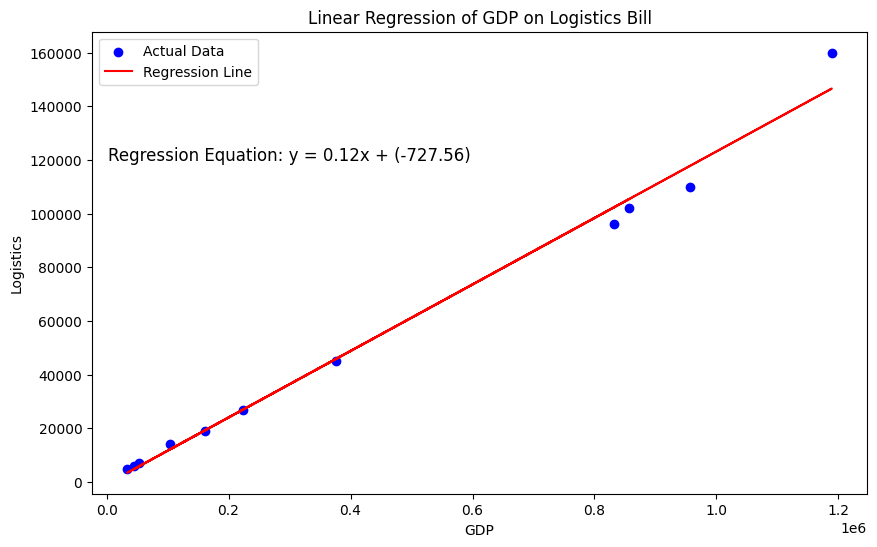

               GDP  Logistics Bill
count      11.0000         11.0000
mean   439381.8182      53727.2727
std    432150.6192      53840.6740
min     33900.0000       5000.0000
25%     78750.0000      10500.0000
50%    223600.0000      27000.0000
75%    844700.0000      99000.0000
max   1189100.0000     160000.0000
Regression Equation: y = 0.12x + (-727.56)
MSE: 27537705.15142748
R^2: 0.9895504051076529


In [8]:
# Plotting the scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(df['GDP'], df['Logistics Bill'], color='blue', label='Actual Data')
plt.plot(df['GDP'], y_pred, color='red', label='Regression Line')
plt.title('Linear Regression of GDP on Logistics Bill')
plt.xlabel('GDP')
plt.ylabel('Logistics')
plt.legend()

# Adding the regression equation to the plot
plt.text(2500, 120000, f'Regression Equation: y = {slope:.2f}x + ({intercept:.2f})', fontsize=12, color='black')

plt.show()

# Returning the descriptive statistics, the regression equation, MSE, and R-squared value
# descriptive_stats, f'Regression Equation: y = {slope:.2f}x + {intercept:.2f}', mse, r2
print(descriptive_stats)
print(f'Regression Equation: y = {slope:.2f}x + ({intercept:.2f})')

print(f"MSE: {mse}")
print(f"R^2: {r2}")

In [9]:
# 做Python regression chart
# Adding a constant to the independent value
X = sm.add_constant(df['GDP'].values)

# Dependent variable
y = df['Logistics Bill'].values

# Creating an OLS regression model
model = sm.OLS(y, X).fit()

# Getting the summary of the regression
regression_summary = model.summary()

# Get detailed tables from summary as DataFrames
tables = model.summary2().tables
regression_statistics_df = pd.DataFrame(tables[0])

regression_summary

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     852.3
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           3.17e-10
Time:                        13:41:43   Log-Likelihood:                -109.83
No. Observations:                  11   AIC:                             223.7
Df Residuals:                       9   BIC:                             224.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -727.5553   2557.156     -0.285      0.782   -6512.243    5057.132
x1             0.1239      0.004     29.194      0.000       0.114       0.134
==============================================================================
Omnibus:                        7.244   Durbin-Watson:                   2.551
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                2.884
Skew:                           1.004   Prob(JB):                        0.236
Kurtosis:                       4.502   Cond. No.                     8.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
### Residual的正态性，独立性，随机性
from scipy.stats import zscore

# Normality test for residuals:
# We will calculate the residuals and their standardized values (z-scores)

# Fitting the model 模拟模型
model = LinearRegression()
model.fit(df[['GDP']], df['Logistics Bill'])

# Adding predictions to the dataframe
df['Fitted_value'] = model.predict(df[['GDP']]) # 预测的数值被储存再Fitted_value

# Residuals
df['Residual'] = df['Logistics Bill'] - df['Fitted_value']

# Standardized Residuals 标准化残差
df['Standardized_Res'] = zscore(df['Residual'])

# Residual Output Table
residual_output = df[['Fitted_value', 'Standardized_Res']]

# Standardized Residual Descriptive Statistics
std_res_desc = df['Standardized_Res'].describe()
pd.options.display.float_format = '{:.4f}'.format

print(residual_output)

print("\nDescriptive statistics:")
std_res_desc

    Fitted_value  Standardized_Res
0     19325.1433           -0.0620
1     12174.0882            0.3479
2    117865.9385           -1.4989
3    146643.6679            2.5452
4      5890.5788            0.2114
5      3473.8445            0.2908
6    105460.0354           -0.6594
7     26984.3323            0.0030
8      4886.7046            0.2122
9     45834.8604           -0.1591
10   102460.8060           -1.2312

Descriptive statistics:


count   11.0000
mean     0.0000
std      1.0488
min     -1.4989
25%     -0.4092
50%      0.0030
75%      0.2515
max      2.5452
Name: Standardized_Res, dtype: float64

In [11]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

# Using describe() to get most of the descriptive statistics
desc_stats = df.describe()
print(desc_stats)


# Calculating the boundaries for outliers 计算残差的离群值
Q1 = df['Standardized_Res'].quantile(0.25)
Q3 = df['Standardized_Res'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Remove outliers
df = df[(df['Standardized_Res'] >= lower_bound) & (df['Standardized_Res'] <= upper_bound)]

# Displaying the results 展示箱线图的结果
print("Box Plot Values:")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}\n")



               GDP  Logistics Bill  Fitted_value   Residual  Standardized_Res
count      11.0000         11.0000       11.0000    11.0000           11.0000
mean   439381.8182      53727.2727    53727.2727    -0.0000            0.0000
std    432150.6192      53840.6740    53558.6287  5503.7692            1.0488
min     33900.0000       5000.0000     3473.8445 -7865.9385           -1.4989
25%     78750.0000      10500.0000     9032.3335 -2147.4479           -0.4092
50%    223600.0000      27000.0000    26984.3323    15.6677            0.0030
75%    844700.0000      99000.0000   103960.4207  1319.7255            0.2515
max   1189100.0000     160000.0000   146643.6679 13356.3321            2.5452
Box Plot Values:
Q1: -0.4092218029415134, Q3: 0.2514894258964096, IQR: 0.660711228837923
Lower Bound for Outliers: -1.4002886461983979
Upper Bound for Outliers: 1.242556269153294



Rounded Number of classes: 4
class Range: 0.3947832197307997


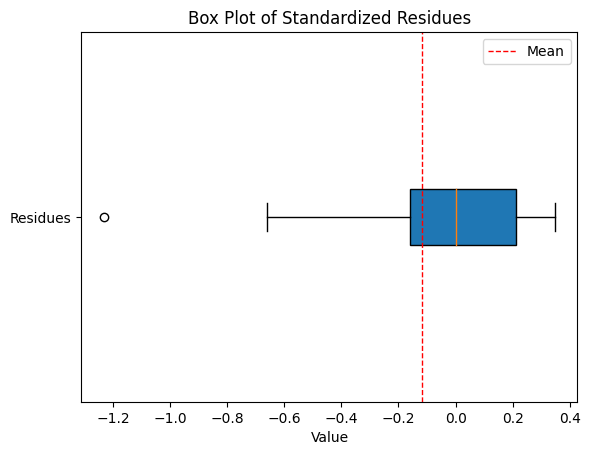

Classes:
   Standart_Residuals  Frequency
0             -0.8364          1
1             -0.4416          1
2             -0.0468          2
3              0.3479          5 



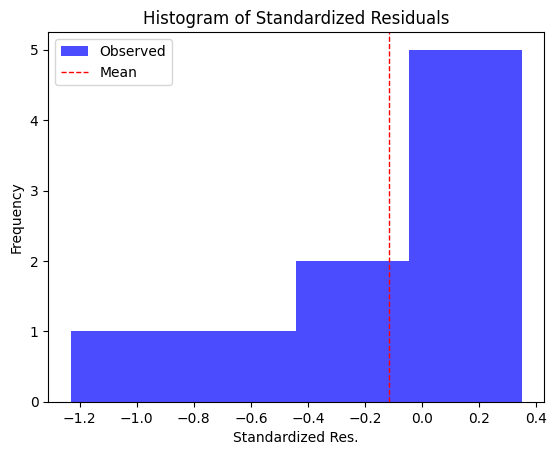

     CDF  Bin Frequency  Expected Value
0 0.0826         0.0826          0.7431
1 0.2653         0.1827          1.6445
2 0.5532         0.2879          2.5914
3 0.8145         0.2613          2.3518
4  Sum =         0.8145          9.0000
Chi-Square Table:
       χ^2
0   0.0888
1   0.2526
2   0.1349
3   2.9819
Sum 3.4583
Chi-square Statistic: 2.507334621016595, p-value: 0.11331744431483559


<ipython-input-12-91be560eecde>:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_df = table_df.append(sum_row, ignore_index=True)


In [12]:
## 正态性
# Calculate mean and standard deviation
mean = df['Standardized_Res'].mean()
std_dev = df['Standardized_Res'].std()

# Calculate Sturges' number of bins
n = len(df)
k = int(1 + 3.322 * np.log10(n))
classrange = np.ptp(df['Standardized_Res']) / k
print("Rounded Number of classes:", k)
print("class Range:", classrange)

# Histogram and expected frequencies
hist, bin_edges = np.histogram(df['Standardized_Res'], bins=k)
cdf_values = stats.norm.cdf(bin_edges + classrange, mean, std_dev)

# Box plot
plt.boxplot(df['Standardized_Res'], vert=False, patch_artist=True)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Box Plot of Standardized Residues')
plt.xlabel('Value')
plt.yticks([1], ['Residues'])
plt.legend()
plt.show()


# Create a DataFrame for histogram data
hist_df = pd.DataFrame({'Standart_Residuals': bin_edges[:-1], 'Frequency': hist})

bin_frequencies = []
for i in range(0, len(cdf_values) - 1):
    if i == 0:
        frequency = cdf_values[0]
    else:
        frequency = cdf_values[i] - cdf_values[i - 1]
    bin_frequencies.append(frequency)
bin_frequencies = np.array(bin_frequencies)

# Expected values
expected_values = bin_frequencies * n

# Normalize expected frequencies
expected_frequencies_normalized = expected_values * (hist.sum() / expected_values.sum())


# Calculate chi-square values for each bin
chi_square_values = (hist - expected_values) ** 2 / expected_values
chi_square_df = pd.DataFrame({'χ^2': chi_square_values})
# Add a row for the sum of chi-square values
chi_square_df.loc['Sum'] = chi_square_df.sum()

# Chi-square goodness of fit test
chi_square_stat, p_value = stats.chisquare(hist, f_exp=expected_frequencies_normalized, ddof=2)
hist_df.Standart_Residuals = hist_df.Standart_Residuals + classrange

print("Classes:")
print(hist_df, "\n")
bin_centers = bin_edges[1:]

# Histogram
plt.hist(df['Standardized_Res'], bins=bin_edges, alpha=0.7, color='blue', label='Observed')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Histogram of Standardized Residuals')
plt.xlabel('Standardized Res.')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Combined table of CDF, Bin Frequency, and Expected Value
table_df = pd.DataFrame({
    'CDF': cdf_values[:-1],  # Exclude the last CDF value which is always 1
    'Bin Frequency': bin_frequencies,
    'Expected Value': expected_values
})

# Add a 'Sum' row at the end of the DataFrame
sum_row = pd.DataFrame({
    'CDF': ['Sum ='],
    'Bin Frequency': [bin_frequencies.sum()],
    'Expected Value': [expected_frequencies_normalized.sum()]
})

# Append the sum row to the table
table_df = table_df.append(sum_row, ignore_index=True)

# Display the table
print(table_df)

print("Chi-Square Table:")
print(chi_square_df)

# Print the results
print(f"Chi-square Statistic: {chi_square_stat}, p-value: {p_value}")

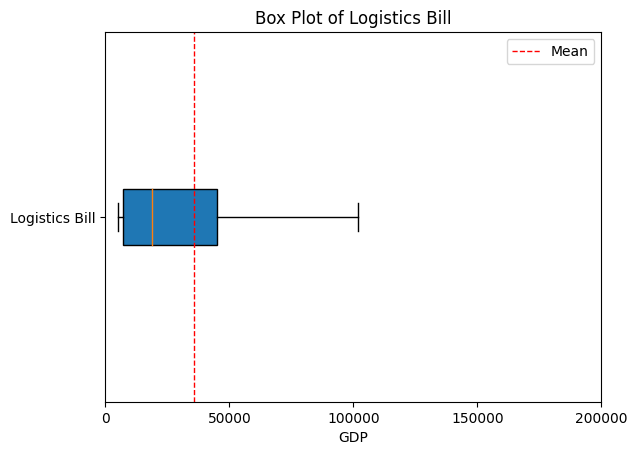

In [13]:
### 新添加  检测是否有离群值
# Calculate mean and standard deviation
mean1 = df['Logistics Bill'].mean()
import matplotlib.pyplot  as plt
plt.boxplot(df['Logistics Bill'], vert=False, patch_artist=True)
plt.axvline(mean1, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Box Plot of Logistics Bill')
plt.xlabel('GDP')
plt.yticks([1], ['Logistics Bill'])
plt.xticks(range(0, 200001, 50000))
plt.legend()
plt.show()

[]


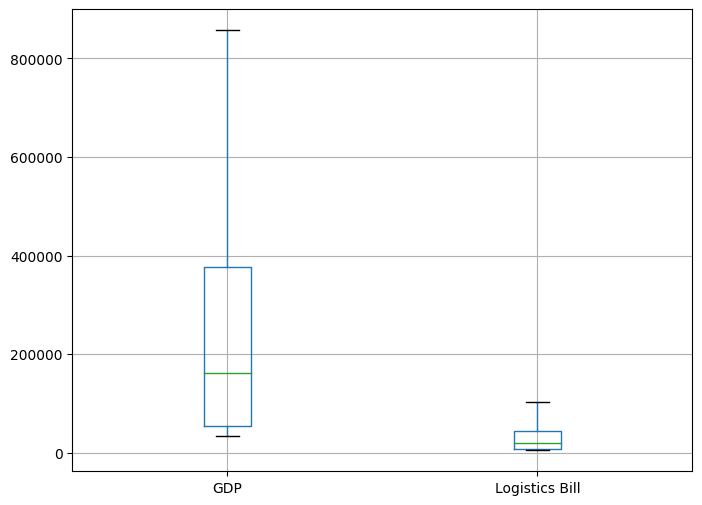

In [14]:
### 新添加

df4 = df[['GDP','Logistics Bill']]
plt.figure(figsize = (8,6))
outlier = df4.boxplot(return_type = 'dict')
x = outlier['fliers'][1].get_xdata() # 这个get_xdata我不太清楚啥意思，可能是表示哪一个column的异常值。
y = outlier['fliers'][1].get_ydata() # 具体的异常值是什么
y1 = list(y)
print(y1)

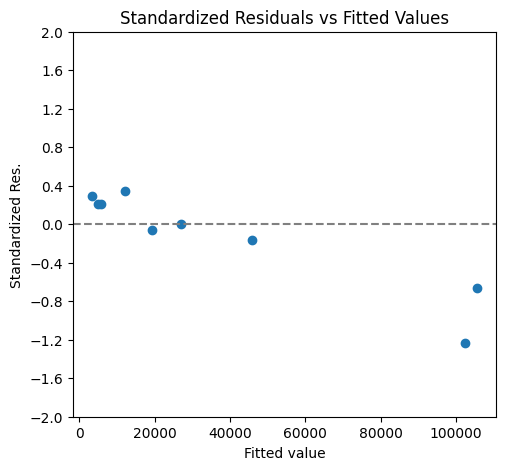

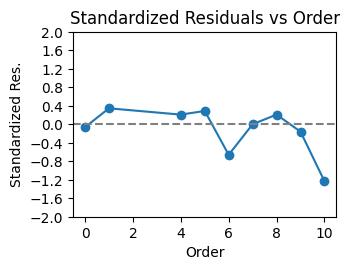

,GDP (x),t_value,St_Error_of_Prediction,Error,Lower_Bound,Point_Prediction,Upper_Bound
0,600000,2.3060,1093.8038,2522.3160,68145.1477,70667.4637,73189.7797


In [28]:
from scipy import stats

# We need to calculate the standard error of the prediction and the prediction intervals 标准误
# Based on the provided parameters and spending values for predictions

# Parameters
alpha = 0.05  # Significance level
prediction_level = 0.95  # Confidence level
x_bar = np.mean(df['GDP'])  # Mean of GDP
s_x = np.std(df['GDP'])  # Standard deviation of GDP
n = len(df)  # Sample size
t_value = stats.t.ppf(1 - alpha/2, df=n-1)  # t-value for 95% confidence

#GDP values for which we want to calculate prediction intervals
GDP_values = [600000]

# Data for the model
X = df['GDP'].values.reshape(-1, 1)
y = df['Logistics Bill'].values


# Fitting the model
model = LinearRegression().fit(X, y)

# Residual standard error (RSE)
residuals = y - model.predict(X)
RSE = np.sqrt(np.sum(residuals**2) / (n - 2))

# Define function to calculate prediction interval
def predict_interval(x_new, x_mean, s_x, RSE, n, t_value):
    SE_pred = RSE * np.sqrt(1 + 1/n + ((x_new - x_mean)**2) / ((s_x**2) * (n - 1)))
    prediction = model.predict([[x_new]])[0]
    lower_bound = prediction - t_value * SE_pred
    upper_bound = prediction + t_value * SE_pred
    return SE_pred, lower_bound, prediction, upper_bound

# Calculate prediction intervals for each spending value
predictions = [predict_interval(x, x_bar, s_x, RSE, n, t_value) for x in GDP_values]

# Prepare the table with the results
prediction_table = pd.DataFrame(predictions,
                                columns=['St_Error_of_Prediction', 'Lower_Bound', 'Point_Prediction', 'Upper_Bound'],
                                index=GDP_values)

# Add t-value and error columns
prediction_table['t_value'] = t_value
prediction_table['Error'] = RSE

# Reorder columns for the final table
prediction_table = prediction_table[['t_value', 'St_Error_of_Prediction', 'Error', 'Lower_Bound', 'Point_Prediction', 'Upper_Bound']]

prediction_table.reset_index().rename(columns={'index': 'GDP (x)'})

# Calculate prediction intervals and error based on t-value * St. Error of Prediction
prediction_table['Error'] = prediction_table['t_value'] * prediction_table['St_Error_of_Prediction']

# Reorder columns for the final table after updating the Error column
prediction_table = prediction_table[['t_value', 'St_Error_of_Prediction', 'Error', 'Lower_Bound', 'Point_Prediction', 'Upper_Bound']]

# Prepare the residual plots again with the line connecting points on the second scatter plot
plt.figure(figsize=(12, 5))

# Residuals vs Fitted values
plt.subplot(1, 2, 1)
plt.scatter(df['Fitted_value'], df['Standardized_Res'])
plt.axhline(0, color='grey', linestyle='--')
plt.xlabel('Fitted value')
plt.ylabel('Standardized Res.')
plt.title('Standardized Residuals vs Fitted Values')

# 设置纵轴坐标范围和间隔
plt.ylim(-2.0,2.0)
plt.yticks(np.arange(-2.0, 2.1, 0.4))

plt.show()

# Residuals vs Order of data with line connecting points
plt.subplot(2, 2, 1)
plt.plot(df.index, df['Standardized_Res'], marker='o', linestyle='-')  # Line added here
plt.axhline(0, color='grey', linestyle='--')
plt.xlabel('Order')
plt.ylabel('Standardized Res.')
plt.title('Standardized Residuals vs Order')

# 设置纵轴坐标范围和间隔
plt.ylim(-2.0,2.0)
plt.yticks(np.arange(-2.0, 2.1, 0.4))

plt.tight_layout()
plt.show()

# Show the updated prediction table
prediction_table.reset_index().rename(columns={'index': 'GDP (x)'})
